## 필요한 라이브러리 불러오기

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 필요한 데이터 로드

In [2]:
champs = pd.read_csv("../data/champs.csv")
champs.head()

,name,id
0,Jax,24
1,Sona,37
2,Tristana,18
3,Varus,110
4,Fiora,114


In [3]:
matches = pd.read_csv("../data/matches.csv")
matches.head()

,id,gameid,platformid,queueid,seasonid,duration,creation,version
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675


In [4]:
participants = pd.read_csv("../data/participants.csv")
participants.head()

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID


In [43]:
stats1 = pd.read_csv("../data/stats1.csv")
stats1.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [44]:
stats2 = pd.read_csv("../data/stats1.csv")
stats2.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [9]:
teambans = pd.read_csv("../data/teambans.csv")
teambans.head()

,matchid,teamid,championid,banturn
0,10,100,11,1
1,10,100,117,3
2,10,100,120,5
3,10,200,84,2
4,10,200,201,4


In [10]:
teamstats = pd.read_csv("../data/teamstats.csv")
teamstats.head()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,100,0,1,0,0,0,0,5,0,0,0,0
1,10,200,1,0,1,1,1,1,10,3,1,3,1
2,11,100,1,0,0,0,0,0,2,0,0,0,0
3,11,200,0,1,1,0,1,0,10,3,0,2,0
4,12,100,1,0,0,0,0,0,1,0,0,0,0


In [46]:
print(stats1.shape, stats2.shape)
stats = stats1.append(stats2)
print(stats.shape)

(999999, 56) (999999, 56)
(1999998, 56)


In [47]:
stats.columns

Index(['id', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')

## 데이터 가공

In [190]:
print(participants.shape, stats.shape)

(1834520, 8) (1999998, 56)


In [191]:
champs[champs['name'] == 'Yasuo']

,name,id
21,Yasuo,157


In [192]:
match_yasuo_list = participants[participants['championid'] == 157]['matchid'].tolist()
match_yasuo_list[:5]

[11, 15, 16, 21, 32]

In [193]:
participants_yasuo = participants[participants['matchid'].isin(match_yasuo_list)]
participants_yasuo.shape

(301506, 8)

In [194]:
stats_yasuo = stats[stats['id'].isin(participants_yasuo['id'])]
stats_yasuo.shape

(331480, 56)

In [195]:
df = pd.merge(participants_yasuo, stats_yasuo, on='id', how='left')

In [196]:
df.dropna(axis=0, inplace=True)
df

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,19,11,1,115,3,4,DUO_SUPPORT,BOT,0.0,3092.0,...,2.0,2.0,0.0,236.0,12.0,3.0,0.0,14.0,3.0,0.0
1,19,11,1,115,3,4,DUO_SUPPORT,BOT,0.0,3092.0,...,2.0,2.0,0.0,236.0,12.0,3.0,0.0,14.0,3.0,0.0
2,20,11,2,69,4,7,DUO_CARRY,BOT,0.0,3040.0,...,10.0,10.0,0.0,980.0,12.0,1.0,0.0,10.0,2.0,0.0
3,20,11,2,69,4,7,DUO_CARRY,BOT,0.0,3040.0,...,10.0,10.0,0.0,980.0,12.0,1.0,0.0,10.0,2.0,0.0
4,21,11,3,157,14,4,SOLO,MID,0.0,1038.0,...,49.0,25.0,24.0,203.0,13.0,1.0,0.0,7.0,1.0,1.0
5,21,11,3,157,14,4,SOLO,MID,0.0,1038.0,...,49.0,25.0,24.0,203.0,13.0,1.0,0.0,7.0,1.0,1.0
6,22,11,4,4,4,12,SOLO,TOP,0.0,3157.0,...,1.0,0.0,1.0,324.0,16.0,0.0,0.0,9.0,1.0,0.0
7,22,11,4,4,4,12,SOLO,TOP,0.0,3157.0,...,1.0,0.0,1.0,324.0,16.0,0.0,0.0,9.0,1.0,0.0
8,23,11,5,28,4,11,NONE,JUNGLE,0.0,1402.0,...,70.0,36.0,34.0,564.0,17.0,0.0,0.0,12.0,1.0,0.0
9,23,11,5,28,4,11,NONE,JUNGLE,0.0,1402.0,...,70.0,36.0,34.0,564.0,17.0,0.0,0.0,12.0,1.0,0.0


In [197]:
df.drop_duplicates(inplace=True)
df

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,19,11,1,115,3,4,DUO_SUPPORT,BOT,0.0,3092.0,...,2.0,2.0,0.0,236.0,12.0,3.0,0.0,14.0,3.0,0.0
2,20,11,2,69,4,7,DUO_CARRY,BOT,0.0,3040.0,...,10.0,10.0,0.0,980.0,12.0,1.0,0.0,10.0,2.0,0.0
4,21,11,3,157,14,4,SOLO,MID,0.0,1038.0,...,49.0,25.0,24.0,203.0,13.0,1.0,0.0,7.0,1.0,1.0
6,22,11,4,4,4,12,SOLO,TOP,0.0,3157.0,...,1.0,0.0,1.0,324.0,16.0,0.0,0.0,9.0,1.0,0.0
8,23,11,5,28,4,11,NONE,JUNGLE,0.0,1402.0,...,70.0,36.0,34.0,564.0,17.0,0.0,0.0,12.0,1.0,0.0
10,24,11,6,51,7,4,DUO_CARRY,BOT,1.0,3046.0,...,24.0,15.0,9.0,362.0,15.0,1.0,0.0,6.0,1.0,0.0
12,25,11,7,62,14,4,SOLO,TOP,1.0,1055.0,...,8.0,6.0,2.0,25.0,15.0,1.0,0.0,11.0,2.0,0.0
14,26,11,8,134,4,1,SOLO,MID,1.0,3165.0,...,3.0,3.0,0.0,419.0,15.0,2.0,0.0,11.0,1.0,0.0
16,27,11,9,43,14,4,DUO_SUPPORT,BOT,1.0,3092.0,...,0.0,0.0,0.0,227.0,13.0,3.0,0.0,12.0,3.0,0.0
18,28,11,10,19,4,11,NONE,JUNGLE,1.0,3748.0,...,61.0,40.0,21.0,333.0,14.0,0.0,0.0,10.0,1.0,0.0


In [198]:
df.columns, df.shape

(Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role',
        'position', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
        'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
        'largestmultikill', 'killingsprees', 'longesttimespentliving',
        'doublekills', 'triplekills', 'quadrakills', 'pentakills',
        'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
        'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
        'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
        'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
        'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
        'goldearned', 'goldspent', 'turretkills', 'inhibkills',
        'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
        'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
        'wardsbought', 'wardsplaced', 'wardskilled', 'firs

In [ ]:
good_champs = ['Galio', 'Gragas', 'Gnar', 'Nami', 'Nautilus', 'Darius', 'Diana', 'Draven', 'Rakan', 'Rammus', 'RekSai', 'Lulu', '']

In [210]:
print(champs['name'])

0               Jax
1              Sona
2          Tristana
3             Varus
4             Fiora
5            Singed
6        Tahm Kench
7           LeBlanc
8            Thresh
9             Karma
10             Jhin
11           Rumble
12             Udyr
13          Lee Sin
14           Yorick
15             Ornn
16             Kayn
17         Kassadin
18            Sivir
19     Miss Fortune
20           Draven
21            Yasuo
22            Kayle
23            Shaco
24         Renekton
25          Hecarim
26             Fizz
27           KogMaw
28           Maokai
29        Lissandra
           ...     
108         Kalista
109           Akali
110              Vi
111           Amumu
112            Lulu
113         Morgana
114        Nocturne
115           Diana
116    Aurelion Sol
117            Zyra
118          Viktor
119      Cassiopeia
120           Nasus
121          Twitch
122         DrMundo
123         Orianna
124         Evelynn
125          RekSai
126             Lux


In [199]:
df[df['championid'] == 157]['win'].sum() / len(df[df['championid'] == 157]['win'])

0.5142391697839991

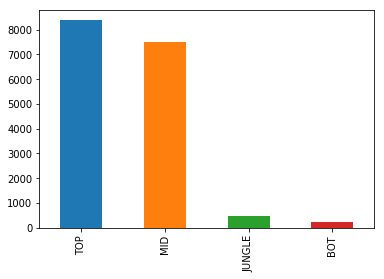

In [207]:
yasuo_position = df[df['championid'] == 157]['position'].value_counts()
yasuo_position.plot(kind='bar')

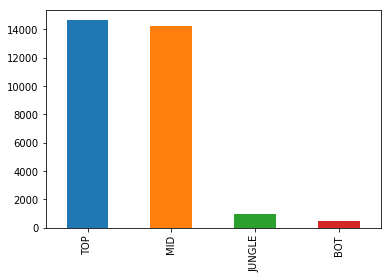

In [206]:
participants[participants['championid'] == 157]['position'].value_counts().plot(kind='bar')